# 1. Import Libraries and Load Data

In this notebook, I'll clean the survey data. This includes downloading the data, removing duplicates, handling missing values, and normalizing the compensation columns.

In [ ]:
import pandas as pd
import numpy as np
import urllib.request

# Define the URL for the dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

# Download the file
filename = 'survey.csv'
urllib.request.urlretrieve(dataset_url, filename)

# Load the data into a DataFrame
df = pd.read_csv(filename)

# Display the data shape to verify
print(f"Original data shape: {df.shape}")
df.head()

Original data shape: (11552, 85)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


# 2. Find and Remove Duplicates

First, I'll check for any duplicate rows in the dataset and then remove them to ensure data integrity.



In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print(f"Data shape after removing duplicates: {df.shape}")

Number of duplicate rows: 154
Data shape after removing duplicates: (11398, 85)


# 3. Impute Missing Values

I'll check for missing values. For a categorical column like `WorkLoc`, I'll impute (fill) the `NaN` values with the **mode** (the most frequent value).

In [ ]:
# Check the value counts for 'WorkLoc'
print("--- WorkLoc Value Counts (Before) ---")
print(df['WorkLoc'].value_counts())

# Find the most frequent value (mode)
workloc_mode = df['WorkLoc'].mode()[0]
print(f"\nThe most frequent WorkLoc is: {workloc_mode}")

# Impute all NaN values in 'WorkLoc' with the mode
df['WorkLoc'].fillna(workloc_mode, inplace=True)

# Verify the imputation was successful
print(f"\nMissing 'WorkLoc' values after imputation: {df['WorkLoc'].isnull().sum()}")

--- WorkLoc Value Counts (Before) ---
WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64

The most frequent WorkLoc is: Office

Missing 'WorkLoc' values after imputation: 0


/tmp/ipython-input-3437534874.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WorkLoc'].fillna(workloc_mode, inplace=True)


# 4. Normalize Annual Compensation

The dataset has two compensation columns: `CompFreq` (Yearly, Monthly, Weekly) and `CompTotal` (the amount). To compare salaries fairly, I must normalize them to a single annual figure.

I'll create a new column `NormalizedAnnualCompensation` using an efficient vectorized `np.select` operation.

In [ ]:
# Define the conditions based on 'CompFreq'
conditions = [
    (df['CompFreq'] == 'Weekly'),
    (df['CompFreq'] == 'Monthly'),
    (df['CompFreq'] == 'Yearly')
]

# Define the corresponding values (multipliers)
values = [
    df['CompTotal'] * 52,
    df['CompTotal'] * 12,
    df['CompTotal'] * 1  # or just df['CompTotal']
]

# Use np.select to apply the logic and create the new column
# default=np.nan ensures any rows that are not W, M, or Y are set to NaN
df['NormalizedAnnualCompensation'] = np.select(conditions, values, default=np.nan)

# Verify the new column
print("Normalization complete. Showing a sample of the results:")
df[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']].head(10)

Normalization complete. Showing a sample of the results:


,CompFreq,CompTotal,NormalizedAnnualCompensation
0,Yearly,61000.0,61000.0
1,Yearly,138000.0,138000.0
2,Yearly,90000.0,90000.0
3,Monthly,29000.0,348000.0
4,Yearly,90000.0,90000.0
5,Monthly,9500.0,114000.0
6,Monthly,3000.0,36000.0
7,Yearly,103000.0,103000.0
8,Yearly,69000.0,69000.0
9,Monthly,8000.0,96000.0


# 5. Final Verification and Save Cleaned Data

As a final step, I'll check the median of the new `NormalizedAnnualCompensation` column and then save the fully cleaned DataFrame to a new CSV file. This new file will be used by all the following notebooks.

In [ ]:
print("Descriptive statistics for Normalized Annual Compensation:")
print(df['NormalizedAnnualCompensation'].describe())

median_normalized_comp = df['NormalizedAnnualCompensation'].median()
print(f"\nThe median Normalized Annual Compensation is: {median_normalized_comp}")

# Save the cleaned data to a new file
df.to_csv('survey_data_cleaned.csv', index=False)
print("\nCleaned data saved to 'survey_data_cleaned.csv'")

Descriptive statistics for Normalized Annual Compensation:
count    1.058300e+04
mean     6.136037e+06
std      9.840938e+07
min      0.000000e+00
25%      5.200000e+04
50%      1.000000e+05
75%      3.600000e+05
max      8.400000e+09
Name: NormalizedAnnualCompensation, dtype: float64

The median Normalized Annual Compensation is: 100000.0

Cleaned data saved to 'survey_data_cleaned.csv'


# 6. EDA - Distribution of Compensation

Now that the data is clean, I'll start the Exploratory Data Analysis by plotting the distribution of the `NormalizedAnnualCompensation` column.

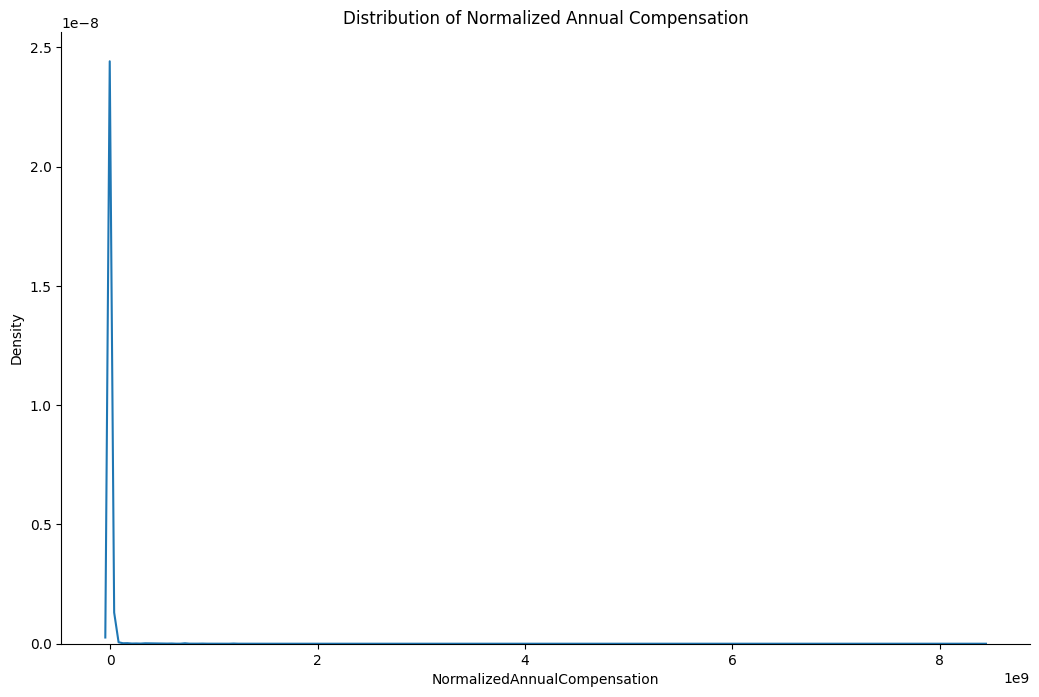

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the distribution of the normalized compensation
sns.displot(df['NormalizedAnnualCompensation'], kind="kde", height=7, aspect=1.5)
plt.title('Distribution of Normalized Annual Compensation')
plt.show()

# 7. EDA - Distribution of Age
Plotting a histogram of the `Age` column to see the age distribution of the survey respondents.

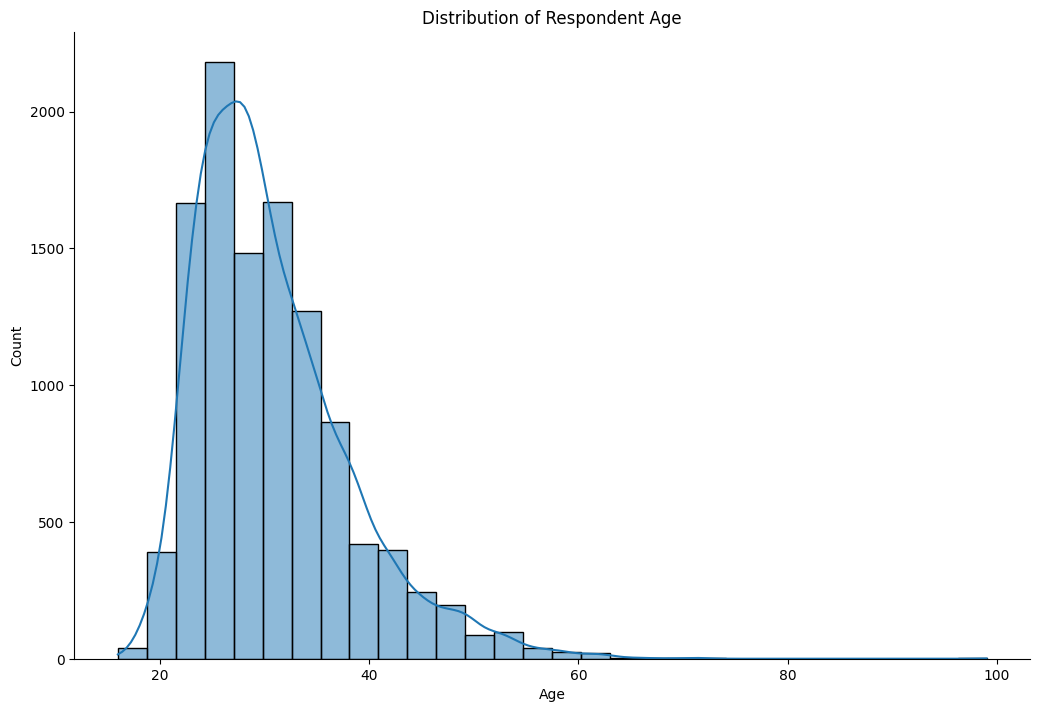

In [10]:
# Plot the histogram for Age
sns.displot(df['Age'], bins=30, kde=True, height=7, aspect=1.5)
plt.title('Distribution of Respondent Age')
plt.show()

# 8. EDA - Identifying Outliers (Compensation)

I'll use a boxplot to visually identify outliers in the `NormalizedAnnualCompensation` column. These are values that are abnormally high or low.

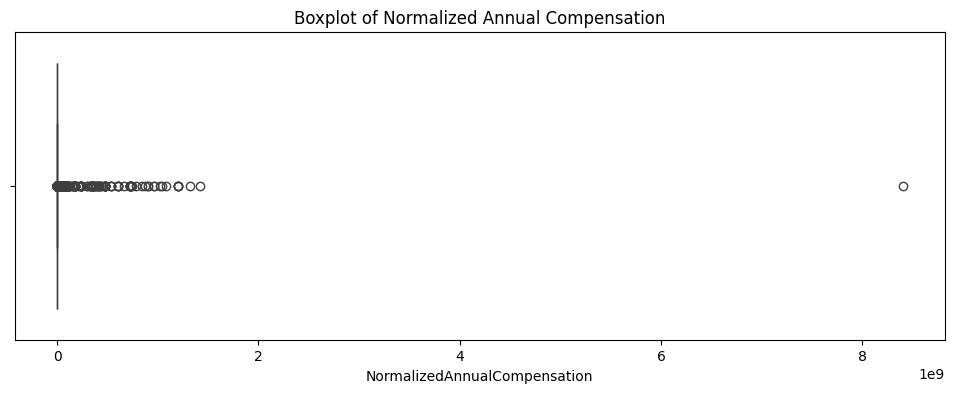

--- 5-Number Summary (Before Outlier Removal) ---
count    1.058300e+04
mean     6.136037e+06
std      9.840938e+07
min      0.000000e+00
25%      5.200000e+04
50%      1.000000e+05
75%      3.600000e+05
max      8.400000e+09
Name: NormalizedAnnualCompensation, dtype: float64


In [11]:
# Visualize outliers with a boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['NormalizedAnnualCompensation'])
plt.title('Boxplot of Normalized Annual Compensation')
plt.show()

# Get the 5-number summary
print("--- 5-Number Summary (Before Outlier Removal) ---")
print(df['NormalizedAnnualCompensation'].describe())

# 9. EDA - Removing Outliers

I will remove the extreme outliers to create a more realistic dataset for analysis. I'll use the Interquartile Range (IQR) method to define the upper and lower bounds.

In [12]:
# Calculate IQR for NormalizedAnnualCompensation
Q1 = df['NormalizedAnnualCompensation'].quantile(0.25)
Q3 = df['NormalizedAnnualCompensation'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
upper_bound = Q3 + (IQR * 1.5)
lower_bound = Q1 - (IQR * 1.5)

print(f"IQR: {IQR}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

# Create a new DataFrame without the outliers
df_no_outliers = df[(df['NormalizedAnnualCompensation'] <= upper_bound) & (df['NormalizedAnnualCompensation'] >= lower_bound)]

print(f"\nOriginal rows (after cleaning): {df.shape[0]}")
print(f"Rows after removing outliers: {df_no_outliers.shape[0]}")

IQR: 308000.0
Upper Bound: 822000.0
Lower Bound: -410000.0

Original rows (after cleaning): 11398
Rows after removing outliers: 8982


# 10. EDA - Correlation Analysis

Now that the outliers are removed, I'll create a correlation matrix and plot it as a heatmap. This helps visualize which numeric features are related to each other.

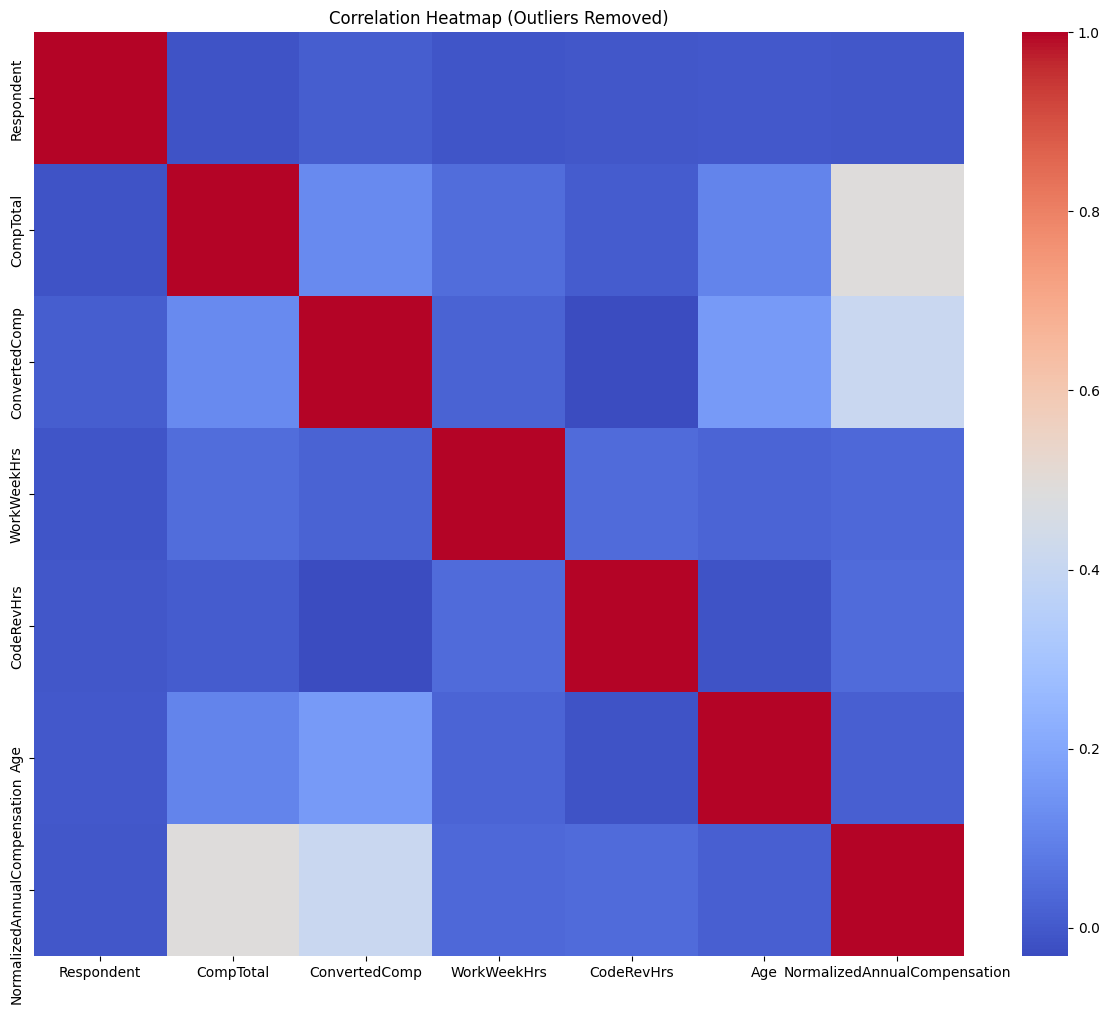

In [13]:
# Create a correlation matrix
# Select only numeric columns for correlation
numeric_cols = df_no_outliers.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Outliers Removed)')
plt.show()

# 11. Save Final Data for Visualization

Finally, I'll save this new, outlier-removed data to a new file. This will be the file I use in the next notebook for SQL and visualization.

In [14]:
# Save this new outlier-removed data for the next visualization notebook
df_no_outliers.to_csv('survey_data_eda_complete.csv', index=False)
print("Saved EDA-complete data to 'survey_data_eda_complete.csv'")

Saved EDA-complete data to 'survey_data_eda_complete.csv'


# 12. Data Visualization with SQL

Now that I have a clean, outlier-removed DataFrame (`df_no_outliers`), I will load it into an in-memory SQLite database. This allows me to practice my SQL skills to query the data for visualization.

In [15]:
import sqlite3

# Create a connection to an in-memory database
conn = sqlite3.connect(":memory:")

# Load the DataFrame 'df_no_outliers' into the database as a table named 'master'
df_no_outliers.to_sql("master", conn, if_exists="replace")

print("In-memory SQLite database created and clean data loaded into 'master' table.")

In-memory SQLite database created and clean data loaded into 'master' table.


# 13. Visualization: Developer Roles (Bar Chart)

I'll use a `GROUP BY` query to count the number of respondents in each `MainBranch` (developer role).

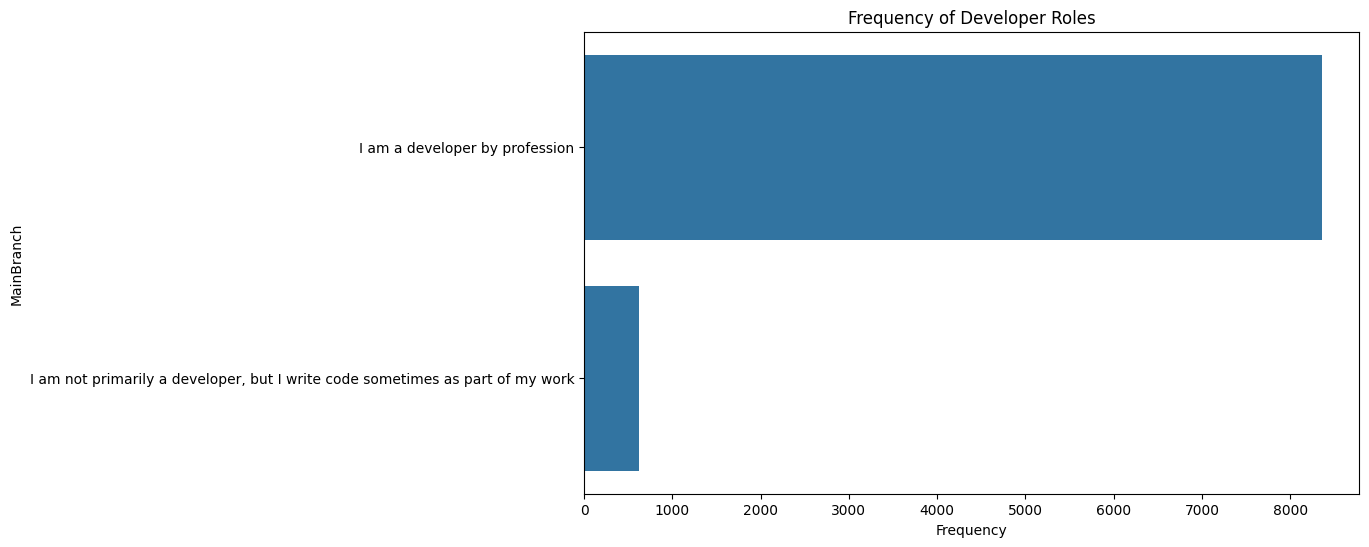

In [16]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch
"""
df_branch = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_branch, y='MainBranch', x='Frequency', orient='h')
plt.title('Frequency of Developer Roles')
plt.show()

# 14. Visualization: Median Salary by Age (Line Chart)

I'll query the median `NormalizedAnnualCompensation` for each `Age`, filter for ages 25-60, and plot it as a line chart to see how salary changes with age.

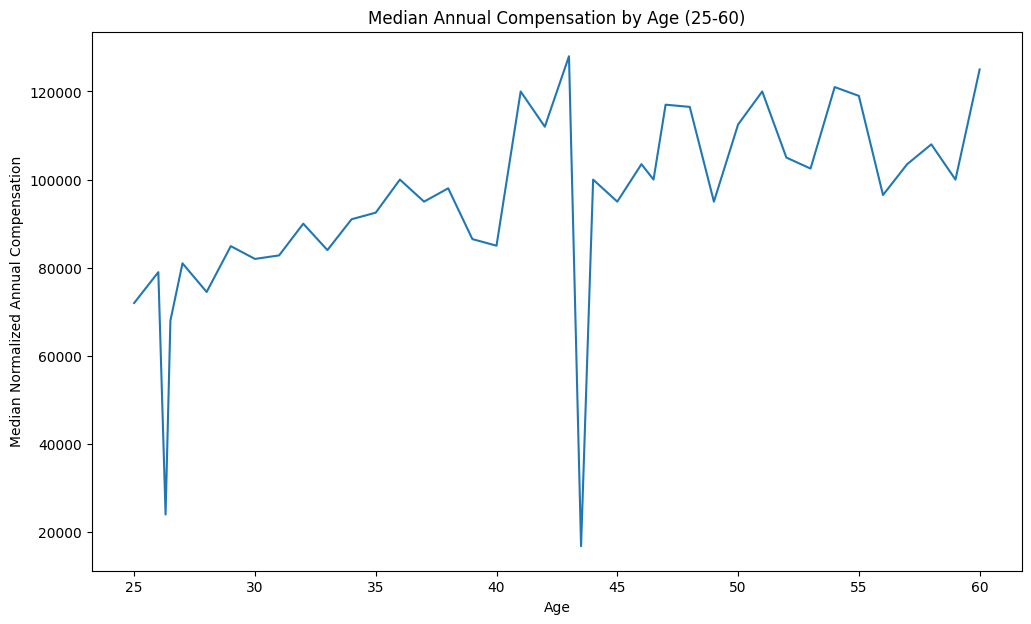

In [18]:
QUERY = """
SELECT Age, NormalizedAnnualCompensation
FROM master
WHERE Age BETWEEN 25 AND 60
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Calculate the median salary for each age
medians = df_age_comp.groupby('Age')['NormalizedAnnualCompensation'].median()

# Plot the line chart
plt.figure(figsize=(12, 7))

# FIX: Removed data=medians. x and y are already specified.
sns.lineplot(x=medians.index, y=medians.values)

plt.title('Median Annual Compensation by Age (25-60)')
plt.xlabel('Age')
plt.ylabel('Median Normalized Annual Compensation')
plt.show()

# 15. Visualization: Top 5 Languages Worked With

I'll query the `LanguageWorkedWith` column to find the 5 most popular languages.

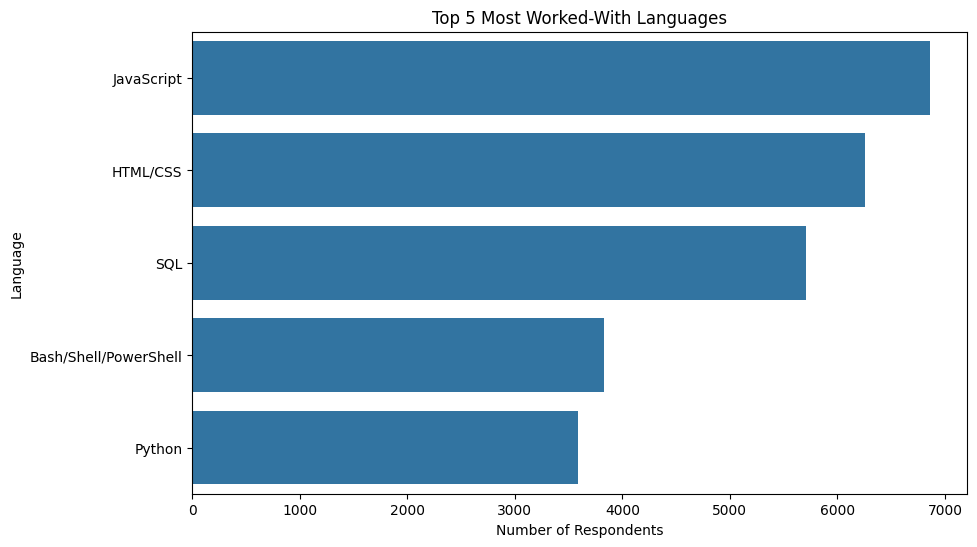

In [31]:
# Query the entire 'LanguageWorkedWith' column
QUERY = """
SELECT LanguageWorkedWith
FROM master
"""
df_lang = pd.read_sql_query(QUERY, conn)

# Split the strings by ';', count each language, and get the top 5
top_5_languages = df_lang['LanguageWorkedWith'].str.split(';').explode().value_counts().head(5)

# Convert to a DataFrame for plotting
df_top_5_lang = top_5_languages.reset_index()
df_top_5_lang.columns = ['Language', 'Count']

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_5_lang, y='Language', x='Count', orient='h')
plt.title('Top 5 Most Worked-With Languages')
plt.xlabel('Number of Respondents')
plt.ylabel('Language')
plt.show()

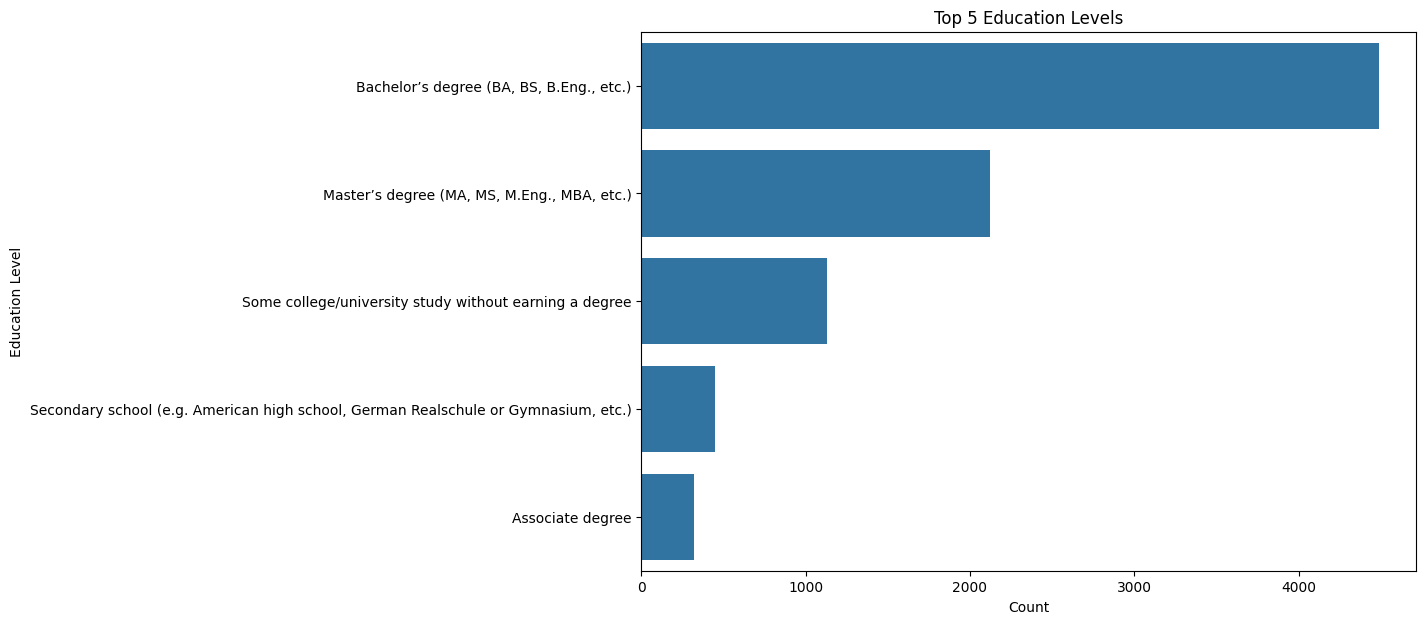

In [25]:
QUERY = """
SELECT EdLevel, COUNT(*) AS Count
FROM master
GROUP BY EdLevel
ORDER BY Count DESC
LIMIT 5
"""
df_edlevel = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 7))

# FIX: Swapped x and y to make the bar chart horizontal
sns.barplot(data=df_edlevel, y='EdLevel', x='Count', orient='h')

plt.title('Top 5 Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

# 16. Close Database Connection

Finally, I'll close the in-memory database connection.

In [32]:
# Close the in-memory database connection
conn.close()
print("Database connection closed.")

Database connection closed.
